In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [57]:
data = load_iris()
label=data.target[0:100]
data=data.data[0:100,0:2]

In [58]:
def sgmoid(z):
        return 1.0 if (z > 0) else 0.0

In [59]:
lr=.5
epochs=100
m, n = data.shape
theta = np.zeros((n+1,1))
n_miss_list = []


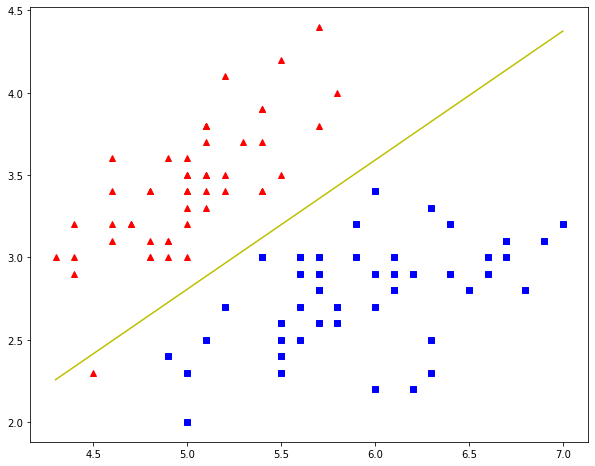

In [64]:
for epoch in range(epochs):
    n_miss = 0
    for idx, x_i in enumerate(data):
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)
        y_hat = sgmoid(np.dot(x_i.T, theta))
        if (np.squeeze(y_hat) - label[idx]) != 0:
            theta += lr*((label[idx] - y_hat)*x_i)
            n_miss += 1
        
    n_miss_list.append(n_miss)
        

x1 = [min(data[:,0]), max(data[:,0])]
m = -theta[1]/theta[2]
c = -theta[0]/theta[2]
x2 = m*x1 + c
fig = plt.figure(figsize=(10,8))
plt.plot(data[:, 0][label==0], data[:, 1][label==0], "r^")
plt.plot(data[:, 0][label==1], data[:, 1][label==1], "bs")
plt.plot(x1, x2, 'y-')

